# 692 - Siegbert and Jo

## Problem Statement


Siegbert and Jo take turns playing a game with a heap of $N$ pebbles:<br />
1. Siegbert is the first to take some pebbles. He can take as many pebbles as he wants. (Between 1 and $N$ inclusive.)<br />
2. In each of the following turns the current player must take at least one pebble and at most twice the amount of pebbles taken by the previous player.<br />
3. The player who takes the last pebble wins.<br />

Although Siegbert can always win by taking all the pebbles on his first turn, to make the game more interesting he chooses to take the smallest number of pebbles that guarantees he will still win (assuming both Siegbert and Jo play optimally for the rest of the game).

Let $H(N)$ be that minimal amount for a heap of $N$ pebbles.<br />
$H(1)=1$, $H(4)=1$, $H(17)=1$, $H(8)=8$ and $H(18)=5$ .

Let $G(n)$ be $\displaystyle{\sum_{k=1}^n H(k)}$.<br />
$G(13)=43$.

Find $G(23416728348467685)$.

## Solution

As a first step, let's use dynamic programming to compute $H(n)$ and see if we can observe a pattern for low $n$ values.

In [1]:
import matplotlib.pyplot as plt
from functools import cache

@cache
def can_win(n, last_move):
    # If there are no pebbles left, the current player loses
    if n == 0:
        return False
    # Try every possible move from 1 pebble up to 2 * last_move, but not more than n
    max_take = min(2 * last_move, n)
    for x in range(1, max_take + 1):
        # If the next state is a losing state for the opponent, current player wins
        if not can_win(n - x, x):
            return True
    # If all possible moves lead to winning states for the opponent, current player loses
    return False

def H(n):
    # Siegbert's first move, trying every possible 'x' from 1 to 'n'
    for x in range(1, n + 1):
        # Check if taking 'x' pebbles puts Jo in a losing position
        if not can_win(n - x, x):
            return x  # x is the minimal move to guarantee Siegbert's win

res = []
for n in range(1, 1000):
    res.append(H(n))

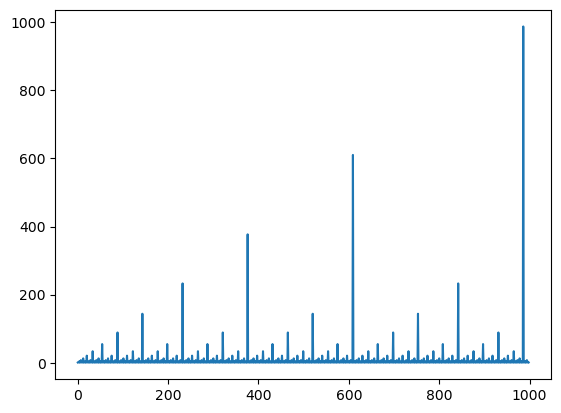

In [2]:
plt.plot(res)

In [3]:
res

[1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 21,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 34,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 55,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 21,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 89,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 21,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 34,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 144,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 21,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 34,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 55,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 13,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 21,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 1,
 233,
 1,
 2,
 3,
 1,
 5,
 1,
 2,
 8,
 1,
 2,
 3,
 

We observe a clear pattern. We can decompose the sequence into several subsequences in the following way

```[1]``` <br>
```[2]``` <br>
```[3, 1]``` <br>
```[5, 1, 2]``` <br>
```[8, 1, 2, 3, 1]``` <br>
```[13, 1, 2, 3, 1, 5, 1, 2]``` <br>
```[21, 1, 2, 3, 1, 5, 1, 2, 8, 1, 2, 3, 1]``` <br>
```[34, 1, 2, 3, 1, 5, 1, 2, 8, 1, 2, 3, 1, 13, 1, 2, 3, 1, 5, 1, 2]```

We note that the first numbers of the subsequences are consecutive Fibonacci numbers. Actually, the $n$-th sequence is the concatenation of the $n$-th Fibonacci number, the $(n - 1)$-th subsequence except its first number and the $(n - 2)$-th subsequence. Moreover, the length of the sequences in order corresponds to the Fibonacci numbers too. Also, we note that the sum of each subsequence is given by the OEIS sequence A029907, where

\begin{equation}
    a(n + 1) = a(n) + a(n - 1) + F(n)
\end{equation}

and $F(n)$ is the $n$-th Fibonacci number.

Conveniently $n = 23416728348467685$ also is a Fibonacci number. This means we need to compute all the Fibonacci numbers up to $n$ and sum all the $a(i)$ along the way. Finally, we will have accounted for all the the $n$ values except one so we need to add the first number of the next subsequence.

In [4]:
total = 0
fib0, fib1 = 1, 1
a0, a1 = 0, 1
while fib1 <= 23416728348467685:
    total += a0
    a0, a1 = a1, a0 + a1 + fib0
    fib0, fib1 = fib1, fib0 + fib1

total + fib0

842043391019219959

We could also have found the solution as $a(80) - F(79)$.

In [5]:
a1 - (fib1 - fib0)

842043391019219959

Alternatively, on the OEIS A029907 page, we find that

\begin{equation}
    a(n) = \frac{(n + 4)F(n) + 2nF(n - 1)}{5}
\end{equation}

so we could simply have used this to get the solution as $a(80) - F(79)$.

In [6]:
n = 80
((n + 4)*fib0 + 2*n*(fib1 - fib0)) // 5 - (fib1 - fib0)

842043391019219959

Note that we could have identified that $H(n)$ corresponds to OEIS A139764 which gives the smallest term in the Zeckendorf representation of $n$ (present in several problems) and found the answer this way.